## 城市AI计算数据预处理

In [1]:
#测评中开放了A,B,C通道，经过分析，可以先对B通道进行预测，抽取训练数据中的2019-01-05、2019-01-06、2019-01-12、2019-01-13、2019-01-19、\
#2019-01-20、2019-01-26的数据
import pandas as pd
import numpy as np
import datetime

class CityAIDataPre():
    
    def readData(self,file):
        global df
        df = pd.read_csv('D:/cityAI/Metro_train/'+file)
        self.df = df
        print(df.shape)
        
    def t_interFun(self,i,str1):
        global t_inter5
        locals()['t_inter'+str(i)] = [(datetime.datetime.strptime(str1,"%Y-%m-%d %H:%M:%S")+ \
                     datetime.timedelta(minutes=i * 10)).strftime("%Y-%m-%d %H:%M:%S") for i in range(0,145)]
#         self.locals()['t_inter'+str(i)]=locals()['t_inter'+str(i)]
        return locals()['t_inter'+str(i)]

    def tInterDeriv(self,pa1,pa2):
        for i in range(len(pa1)-1):
            pa2.loc[(pd.to_datetime(pa2['time'])>pd.to_datetime(pa1[i])) \
                            &(pd.to_datetime(pa2['time'])<=pd.to_datetime(pa1[i+1])),'time_inter'] = \
            '['+pa1[i][11:]+'-'+pa1[i+1][11:]+']'
            
    def RecordSumByInter(self,df2,i):
        locals()['record01_0'+str(i)+'G'] = df2.groupby(['status','time_inter'])['status'].count().unstack('status').fillna(0).sort_values(by='time_inter')
        locals()['record01_0'+str(i)+'G']['sum'] = locals()['record01_0'+str(i)+'G'][0]+locals()['record01_0'+str(i)+'G'][1]
#         self.locals()['record01_0'+str(i)+'G']=locals()['record01_0'+str(i)+'G']
        return locals()['record01_0'+str(i)+'G']
    
    def RSBI_plot(self,df3,color_v):
        return df3['sum'].plot(kind='line',color=color_v)


# caip = CityAIDataPre()
# caip.readData('record_2019-01-12.csv')
# caip.tInterDeriv(caip.t_interFun(12,'2019-01-12 00:00:00'),df)
# caip.RSBI_plot(caip.RecordSumByInter(df,12))
      
    

(2017930, 7)
(1948259, 7)
(2168564, 7)
(2063588, 7)
(2397167, 7)
(2209338, 7)
(2113641, 7)


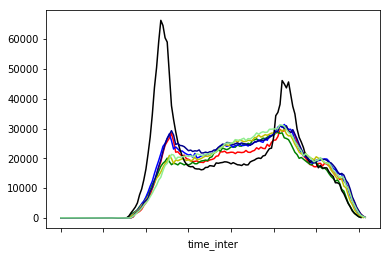

In [24]:
tl = [5,6,12,13,19,20]
cl = ['r','g','b','y','k','DarkBlue','LightGreen']
for i,t in enumerate(tl):
    caip = CityAIDataPre()
    if t==5 or t==6:
        caip.readData('record_2019-01-0'+str(t)+'.csv')
    else:
        caip.readData('record_2019-01-'+str(t)+'.csv')
    caip.tInterDeriv(caip.t_interFun(t,'2019-01-'+str(t)+' '+ '00:00:00'),df)
    caip.RSBI_plot(caip.RecordSumByInter(df,t),cl[i])

通过分析发现，2019-01-14的数据波动规律与其它周六日不同，属于离群值，为了对后续数据更好的预测，模型将剔除2019-01-14的数据;后来发现14号原来是工作日

In [4]:
##LoadData
tl = [5,6,12,13,19,20]
for c in tl:
    if c==5 or c==6:
        locals()['record01_'+str(c)] = pd.read_csv('D:/cityAI/Metro_train/record_2019-01-0'+str(c)+'.csv') 
    else:
        locals()['record01_'+str(c)] = pd.read_csv('D:/cityAI/Metro_train/record_2019-01-'+str(c)+'.csv')

In [5]:
record01_5.head()


,time,lineID,stationID,deviceID,status,userID,payType
0,2019-01-05 00:00:01,C,64,2981,0,B7e0d8dc820a563ee8d12432c33731163,1
1,2019-01-05 00:00:02,C,64,2995,0,B469ec784371746e4630c80f99b953271,1
2,2019-01-05 00:00:02,C,64,2979,0,D84685e3e5496e00836f67607b3e72f8c,3
3,2019-01-05 00:00:03,C,64,2980,0,D188d5a09eca01adb50ba32db931fc68d,3
4,2019-01-05 00:00:06,C,35,1674,0,B00e1369505516e8397fec98445f09c17,1


In [6]:
#数据结构化，把数据重塑成符合建模的形式
def derivT_inter(v,str1):
    locals()['t_inter'+str(v)] = [(datetime.datetime.strptime(str1,"%Y-%m-%d %H:%M:%S")+ \
                     datetime.timedelta(minutes=i * 10)).strftime("%Y-%m-%d %H:%M:%S") for i in range(0,145)]
    return locals()['t_inter'+str(v)]

#重塑2019-01-05的数据
derivT_inter(5,'2019-01-05 00:00:00')


['2019-01-05 00:00:00',
 '2019-01-05 00:10:00',
 '2019-01-05 00:20:00',
 '2019-01-05 00:30:00',
 '2019-01-05 00:40:00',
 '2019-01-05 00:50:00',
 '2019-01-05 01:00:00',
 '2019-01-05 01:10:00',
 '2019-01-05 01:20:00',
 '2019-01-05 01:30:00',
 '2019-01-05 01:40:00',
 '2019-01-05 01:50:00',
 '2019-01-05 02:00:00',
 '2019-01-05 02:10:00',
 '2019-01-05 02:20:00',
 '2019-01-05 02:30:00',
 '2019-01-05 02:40:00',
 '2019-01-05 02:50:00',
 '2019-01-05 03:00:00',
 '2019-01-05 03:10:00',
 '2019-01-05 03:20:00',
 '2019-01-05 03:30:00',
 '2019-01-05 03:40:00',
 '2019-01-05 03:50:00',
 '2019-01-05 04:00:00',
 '2019-01-05 04:10:00',
 '2019-01-05 04:20:00',
 '2019-01-05 04:30:00',
 '2019-01-05 04:40:00',
 '2019-01-05 04:50:00',
 '2019-01-05 05:00:00',
 '2019-01-05 05:10:00',
 '2019-01-05 05:20:00',
 '2019-01-05 05:30:00',
 '2019-01-05 05:40:00',
 '2019-01-05 05:50:00',
 '2019-01-05 06:00:00',
 '2019-01-05 06:10:00',
 '2019-01-05 06:20:00',
 '2019-01-05 06:30:00',
 '2019-01-05 06:40:00',
 '2019-01-05 06:

In [7]:
def tInterDeriv(pa1,pa2):
    for i in range(len(pa1)-1):
        pa2.loc[(pd.to_datetime(pa2['time'])>pd.to_datetime(pa1[i])) \
                        &(pd.to_datetime(pa2['time'])<=pd.to_datetime(pa1[i+1])),'time_inter'] = \
        '['+pa1[i][11:]+'-'+pa1[i+1][11:]+']'
        
tInterDeriv(derivT_inter(5,'2019-01-05 00:00:00'),record01_5)

In [8]:
#checkData
record01_5.tail(20)

,time,lineID,stationID,deviceID,status,userID,payType,time_inter
2017910,2019-01-05 23:58:33,B,33,1602,0,Cb1cc3c2ee0557607539f67205feecadb,2,[23:50:00-00:00:00]
2017911,2019-01-05 23:58:35,B,33,1588,0,A8e18ce0d8fdba9cf964ddc8df0230a59,0,[23:50:00-00:00:00]
2017912,2019-01-05 23:58:36,B,33,1585,0,B1ad9b227e9fc3e3289a9f6dee140df91,1,[23:50:00-00:00:00]
2017913,2019-01-05 23:58:40,B,33,1586,0,B2f195777cae333c1090c00050cd98939,1,[23:50:00-00:00:00]
2017914,2019-01-05 23:58:43,B,33,1587,0,C28234e0dea64b5c96b37e8c32fb089b5,2,[23:50:00-00:00:00]
2017915,2019-01-05 23:58:44,B,33,1600,0,B082a6fa95e9981893b4a3ff03777f55f,1,[23:50:00-00:00:00]
2017916,2019-01-05 23:58:44,B,33,1589,0,C68de2a920966c249e1369ae32b982afe,2,[23:50:00-00:00:00]
2017917,2019-01-05 23:58:44,B,33,1584,0,B0416cec2f2a51447e6d96b4b49282a81,1,[23:50:00-00:00:00]
2017918,2019-01-05 23:58:46,B,33,1586,0,C73f404f0cdac19120afe9c0824dbc719,2,[23:50:00-00:00:00]
2017919,2019-01-05 23:58:50,B,33,1586,0,Cb5aa990da15bb6b30ab368654f095d98,2,[23:50:00-00:00:00]


In [9]:
record01_5G = record01_5.groupby(['status','time_inter'])['status'].count().unstack('status').fillna(0)
record01_5G.head()

status,0,1
time_inter,,
[00:00:00-00:10:00],51.0,27.0
[00:10:00-00:20:00],13.0,24.0
[00:20:00-00:30:00],21.0,18.0
[00:30:00-00:40:00],21.0,26.0
[00:40:00-00:50:00],13.0,37.0


In [10]:
d1 = pd.DataFrame([record01_5G[0],record01_5G[1]]).T

In [11]:
d1.columns = ['0105_outNum','0105_inNum']
d1

,0105_outNum,0105_inNum
time_inter,,
[00:00:00-00:10:00],51.0,27.0
[00:10:00-00:20:00],13.0,24.0
[00:20:00-00:30:00],21.0,18.0
[00:30:00-00:40:00],21.0,26.0
[00:40:00-00:50:00],13.0,37.0
[00:50:00-01:00:00],22.0,25.0
[01:00:00-01:10:00],11.0,28.0
[01:10:00-01:20:00],21.0,24.0
[01:20:00-01:30:00],15.0,19.0


In [31]:
d1.index

Index(['[00:00:00-00:10:00]', '[00:10:00-00:20:00]', '[00:20:00-00:30:00]',
       '[00:30:00-00:40:00]', '[00:40:00-00:50:00]', '[00:50:00-01:00:00]',
       '[01:00:00-01:10:00]', '[01:10:00-01:20:00]', '[01:20:00-01:30:00]',
       '[01:30:00-01:40:00]',
       ...
       '[22:20:00-22:30:00]', '[22:30:00-22:40:00]', '[22:40:00-22:50:00]',
       '[22:50:00-23:00:00]', '[23:00:00-23:10:00]', '[23:10:00-23:20:00]',
       '[23:20:00-23:30:00]', '[23:30:00-23:40:00]', '[23:40:00-23:50:00]',
       '[23:50:00-00:00:00]'],
      dtype='object', name='time_inter', length=144)

In [12]:
d1['time_inter'] = '0105'+'-'+d1.index
d1.time_inter

time_inter
[00:00:00-00:10:00]    0105-[00:00:00-00:10:00]
[00:10:00-00:20:00]    0105-[00:10:00-00:20:00]
[00:20:00-00:30:00]    0105-[00:20:00-00:30:00]
[00:30:00-00:40:00]    0105-[00:30:00-00:40:00]
[00:40:00-00:50:00]    0105-[00:40:00-00:50:00]
[00:50:00-01:00:00]    0105-[00:50:00-01:00:00]
[01:00:00-01:10:00]    0105-[01:00:00-01:10:00]
[01:10:00-01:20:00]    0105-[01:10:00-01:20:00]
[01:20:00-01:30:00]    0105-[01:20:00-01:30:00]
[01:30:00-01:40:00]    0105-[01:30:00-01:40:00]
[01:40:00-01:50:00]    0105-[01:40:00-01:50:00]
[01:50:00-02:00:00]    0105-[01:50:00-02:00:00]
[02:00:00-02:10:00]    0105-[02:00:00-02:10:00]
[02:10:00-02:20:00]    0105-[02:10:00-02:20:00]
[02:20:00-02:30:00]    0105-[02:20:00-02:30:00]
[02:30:00-02:40:00]    0105-[02:30:00-02:40:00]
[02:40:00-02:50:00]    0105-[02:40:00-02:50:00]
[02:50:00-03:00:00]    0105-[02:50:00-03:00:00]
[03:00:00-03:10:00]    0105-[03:00:00-03:10:00]
[03:10:00-03:20:00]    0105-[03:10:00-03:20:00]
[03:20:00-03:30:00]    0105-[

In [13]:
d1.index = range(d1.shape[0])
d1

,0105_outNum,0105_inNum,time_inter
0,51.0,27.0,0105-[00:00:00-00:10:00]
1,13.0,24.0,0105-[00:10:00-00:20:00]
2,21.0,18.0,0105-[00:20:00-00:30:00]
3,21.0,26.0,0105-[00:30:00-00:40:00]
4,13.0,37.0,0105-[00:40:00-00:50:00]
5,22.0,25.0,0105-[00:50:00-01:00:00]
6,11.0,28.0,0105-[01:00:00-01:10:00]
7,21.0,24.0,0105-[01:10:00-01:20:00]
8,15.0,19.0,0105-[01:20:00-01:30:00]
9,21.0,12.0,0105-[01:30:00-01:40:00]


In [14]:
record01_5G2 = record01_5.groupby(['status','lineID','time_inter'])['status'].count().unstack(['status','lineID']).fillna(0)

In [15]:
record01_5G2

status                    0                       1                
lineID                    A       B       C       A       B       C
time_inter                                                         
[00:00:00-00:10:00]     2.0    18.0    31.0     1.0    18.0     8.0
[00:10:00-00:20:00]     3.0     6.0     4.0     3.0    11.0    10.0
[00:20:00-00:30:00]     1.0    13.0     7.0     0.0     7.0    11.0
[00:30:00-00:40:00]     1.0     7.0    13.0     4.0     4.0    18.0
[00:40:00-00:50:00]     1.0     2.0    10.0    10.0     9.0    18.0
[00:50:00-01:00:00]     1.0     2.0    19.0     1.0     9.0    15.0
[01:00:00-01:10:00]     1.0     2.0     8.0     1.0     5.0    22.0
[01:10:00-01:20:00]     5.0     6.0    10.0     5.0     6.0    13.0
[01:20:00-01:30:00]     3.0     3.0     9.0     2.0     5.0    12.0
[01:30:00-01:40:00]     2.0     8.0    11.0     0.0     7.0     5.0
[01:40:00-01:50:00]     2.0     4.0     8.0     0.0     3.0     6.0
[01:50:00-02:00:00]     1.0     2.0    10.0     3.0     2.0     4.0
[02:00:00-02:10:00]     0.0     3.0    17.0     0.0     4.0     7.0
[02:10:00-02:20:00]     3.0     3.0    10.0     2.0     0.0     7.0
[02:20:00-02:30:00]     4.0     0.0    12.0     2.0     0.0     5.0
[02:30:00-02:40:00]    11.0     2.0     3.0     2.0     4.0     5.0
[02:40:00-02:50:00]    13.0     0.0     5.0     0.0     0.0     3.0
[02:50:00-03:00:00]     0.0     3.0     7.0     0.0     1.0     2.0
[03:00:00-03:10:00]     0.0     0.0     3.0     0.0     0.0     2.0
[03:10:00-03:20:00]     0.0     0.0     4.0     0.0     0.0     1.0
[03:20:00-03:30:00]     0.0     6.0     1.0     0.0     1.0     0.0
[03:30:00-03:40:00]     1.0     0.0     1.0     0.0     0.0     0.0
[03:40:00-03:50:00]     0.0     1.0     3.0     0.0     1.0     2.0
[03:50:00-04:00:00]     0.0     0.0     5.0     0.0     0.0     1.0
[04:00:00-04:10:00]     0.0     2.0     1.0     0.0     1.0     7.0
[04:10:00-04:20:00]     0.0     1.0     7.0     5.0    16.0     2.0
[04:20:00-04:30:00]     2.0    16.0     2.0     0.0     3.0     1.0
[04:30:00-04:40:00]     4.0     8.0     0.0     1.0     4.0    22.0
[04:40:00-04:50:00]     0.0     0.0     7.0     2.0     0.0     7.0
[04:50:00-05:00:00]     1.0     0.0    24.0     0.0     0.0     2.0
...                     ...     ...     ...     ...     ...     ...
[19:00:00-19:10:00]  1171.0  6558.0  3537.0  1146.0  5643.0  2682.0
[19:10:00-19:20:00]  1028.0  6260.0  3431.0  1066.0  5739.0  2630.0
[19:20:00-19:30:00]   998.0  5637.0  3308.0   973.0  5643.0  2408.0
[19:30:00-19:40:00]   953.0  5569.0  2984.0   880.0  5122.0  2453.0
[19:40:00-19:50:00]   865.0  5480.0  2938.0   866.0  5100.0  2539.0
[19:50:00-20:00:00]   882.0  5203.0  2970.0   954.0  4810.0  2403.0
[20:00:00-20:10:00]   767.0  4656.0  2931.0  1230.0  5110.0  2493.0
[20:10:00-20:20:00]   796.0  4733.0  3077.0  1441.0  5528.0  2738.0
[20:20:00-20:30:00]   852.0  4762.0  3197.0  1307.0  5507.0  2717.0
[20:30:00-20:40:00]   904.0  4624.0  3112.0  1028.0  5293.0  2508.0
[20:40:00-20:50:00]   962.0  5179.0  3269.0  1122.0  4957.0  2912.0
[20:50:00-21:00:00]   928.0  5112.0  3569.0  1051.0  4765.0  2611.0
[21:00:00-21:10:00]   943.0  4691.0  3371.0  1062.0  5096.0  2377.0
[21:10:00-21:20:00]   843.0  4827.0  3151.0   967.0  4745.0  2361.0
[21:20:00-21:30:00]   845.0  4631.0  3229.0   834.0  4312.0  1915.0
[21:30:00-21:40:00]   812.0  4388.0  3025.0   787.0  3973.0  1948.0
[21:40:00-21:50:00]   767.0  4035.0  2555.0   788.0  4259.0  1843.0
[21:50:00-22:00:00]   669.0  3882.0  2553.0   632.0  3520.0  1651.0
[22:00:00-22:10:00]   667.0  3802.0  2400.0   793.0  3773.0  1775.0
[22:10:00-22:20:00]   645.0  3445.0  2368.0   722.0  3975.0  1628.0
[22:20:00-22:30:00]   546.0  3521.0  2357.0   749.0  2896.0  1330.0
[22:30:00-22:40:00]   549.0  3299.0  2004.0   892.0  2499.0   976.0
[22:40:00-22:50:00]   497.0  2860.0  1796.0   435.0  1979.0   978.0
[22:50:00-23:00:00]   430.0  2695.0  1639.0   244.0  1060.0   603.0
[23:00:00-23:10:00]   383.0  2163.0  1500.0   100.0   70

In [16]:
record01_5G2.index=range(record01_5G2.shape[0])

In [17]:
d2 = pd.concat([d1,record01_5G2[0],record01_5G2[1]],axis=1)
d2.columns

Index(['0105_outNum', '0105_inNum', 'time_inter', 'A', 'B', 'C', 'A', 'B',
       'C'],
      dtype='object')

In [18]:
d2.columns = ['0105_outNum', '0105_inNum', 'time_inter', '0105A_out', '0105B_out', '0105C_out', '0105A_in', '0105B_in','0105C_in']
d2.head()

,0105_outNum,0105_inNum,time_inter,0105A_out,0105B_out,0105C_out,0105A_in,0105B_in,0105C_in
0,51.0,27.0,0105-[00:00:00-00:10:00],2.0,18.0,31.0,1.0,18.0,8.0
1,13.0,24.0,0105-[00:10:00-00:20:00],3.0,6.0,4.0,3.0,11.0,10.0
2,21.0,18.0,0105-[00:20:00-00:30:00],1.0,13.0,7.0,0.0,7.0,11.0
3,21.0,26.0,0105-[00:30:00-00:40:00],1.0,7.0,13.0,4.0,4.0,18.0
4,13.0,37.0,0105-[00:40:00-00:50:00],1.0,2.0,10.0,10.0,9.0,18.0


In [22]:
record01_5G3 = record01_5.groupby(['status','time_inter','stationID'])['status'].count().unstack(['status','stationID']).fillna(0)

In [24]:
record01_5G3.head()

status                 0                                              ...   \
stationID             5    13   16   20   27   30   31   32   33   34 ...    
time_inter                                                            ...    
[00:00:00-00:10:00]  2.0  1.0  3.0  5.0  1.0  1.0  1.0  1.0  3.0  4.0 ...    
[00:10:00-00:20:00]  2.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0 ...    
[00:20:00-00:30:00]  3.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...    
[00:30:00-00:40:00]  2.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
[00:40:00-00:50:00]  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...    

status                 1                                               
stationID             44   46   67   70   71   75   76   19   28   72  
time_inter                                                             
[00:00:00-00:10:00]  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
[00:10:00-00:20:00]  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
[00:20:00-00:30:00]  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
[00:30:00-00:40:00]  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
[00:40:00-00:50:00]  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 160 columns]

In [28]:
record01_5G3.index=range(record01_5G3.shape[0])

In [31]:
d3 = pd.concat([d2,record01_5G3[0]],axis=1)
d3

,0105_outNum,0105_inNum,time_inter,0105A_out,0105B_out,0105C_out,0105A_in,0105B_in,0105C_in,5,...,44,69,12,28,29,36,75,1,2,68
0,51.0,27.0,0105-[00:00:00-00:10:00],2.0,18.0,31.0,1.0,18.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.0,24.0,0105-[00:10:00-00:20:00],3.0,6.0,4.0,3.0,11.0,10.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.0,18.0,0105-[00:20:00-00:30:00],1.0,13.0,7.0,0.0,7.0,11.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.0,26.0,0105-[00:30:00-00:40:00],1.0,7.0,13.0,4.0,4.0,18.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,37.0,0105-[00:40:00-00:50:00],1.0,2.0,10.0,10.0,9.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,22.0,25.0,0105-[00:50:00-01:00:00],1.0,2.0,19.0,1.0,9.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,11.0,28.0,0105-[01:00:00-01:10:00],1.0,2.0,8.0,1.0,5.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,21.0,24.0,0105-[01:10:00-01:20:00],5.0,6.0,10.0,5.0,6.0,13.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,15.0,19.0,0105-[01:20:00-01:30:00],3.0,3.0,9.0,2.0,5.0,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,21.0,12.0,0105-[01:30:00-01:40:00],2.0,8.0,11.0,0.0,7.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
d3.columns

Index(['0105_outNum',  '0105_inNum',  'time_inter',   '0105A_out',
         '0105B_out',   '0105C_out',    '0105A_in',    '0105B_in',
          '0105C_in',             5,            13,            16,
                  20,            27,            30,            31,
                  32,            33,            34,            35,
                  45,            49,            55,            60,
                  64,            65,            66,            74,
                  80,             6,            39,            50,
                  58,            72,             0,             4,
                  11,            14,            23,            37,
                  43,            52,            53,            57,
                  63,             3,             8,            24,
                  40,            42,            62,            76,
                  41,            56,            51,            61,
                  77,            79,            59,           

In [46]:
d3.columns = ['0105_outNum','0105_inNum','time_inter','0105A_out',
              '0105B_out','0105C_out','0105A_in','0105B_in','0105C_in',
              '0105_station5_out', '0105_station13_out', '0105_station16_out',
       '0105_station20_out', '0105_station27_out', '0105_station30_out',
       '0105_station31_out', '0105_station32_out', '0105_station33_out',
       '0105_station34_out', '0105_station35_out', '0105_station45_out',
       '0105_station49_out', '0105_station55_out', '0105_station60_out',
       '0105_station64_out', '0105_station65_out', '0105_station66_out',
       '0105_station74_out', '0105_station80_out', '0105_station6_out',
       '0105_station39_out', '0105_station50_out', '0105_station58_out',
       '0105_station72_out', '0105_station0_out', '0105_station4_out',
       '0105_station11_out', '0105_station14_out', '0105_station23_out',
       '0105_station37_out', '0105_station43_out', '0105_station52_out',
       '0105_station53_out', '0105_station57_out', '0105_station63_out',
       '0105_station3_out', '0105_station8_out', '0105_station24_out',
       '0105_station40_out', '0105_station42_out', '0105_station62_out',
       '0105_station76_out', '0105_station41_out', '0105_station56_out',
       '0105_station51_out', '0105_station61_out', '0105_station77_out',
       '0105_station79_out', '0105_station59_out', '0105_station18_out',
       '0105_station48_out', '0105_station78_out', '0105_station47_out',
       '0105_station73_out', '0105_station7_out', '0105_station21_out',
       '0105_station15_out', '0105_station25_out', '0105_station9_out',
       '0105_station19_out', '0105_station38_out', '0105_station67_out',
       '0105_station70_out', '0105_station71_out', '0105_station10_out',
       '0105_station26_out', '0105_station46_out', '0105_station17_out',
       '0105_station22_out', '0105_station44_out', '0105_station69_out',
       '0105_station12_out', '0105_station28_out', '0105_station29_out',
       '0105_station36_out', '0105_station75_out', '0105_station1_out',
       '0105_station2_out', '0105_station68_out']
# d3.iloc[:,9:].columns = '0105_'+ 'station'+ d3.iloc[:,9:].columns.astype('str') + '_out'

In [47]:
d3.head()

,0105_outNum,0105_inNum,time_inter,0105A_out,0105B_out,0105C_out,0105A_in,0105B_in,0105C_in,0105_station5_out,...,0105_station44_out,0105_station69_out,0105_station12_out,0105_station28_out,0105_station29_out,0105_station36_out,0105_station75_out,0105_station1_out,0105_station2_out,0105_station68_out
0,51.0,27.0,0105-[00:00:00-00:10:00],2.0,18.0,31.0,1.0,18.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.0,24.0,0105-[00:10:00-00:20:00],3.0,6.0,4.0,3.0,11.0,10.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.0,18.0,0105-[00:20:00-00:30:00],1.0,13.0,7.0,0.0,7.0,11.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.0,26.0,0105-[00:30:00-00:40:00],1.0,7.0,13.0,4.0,4.0,18.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,37.0,0105-[00:40:00-00:50:00],1.0,2.0,10.0,10.0,9.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
tmp1 = record01_5G3[1]
tmp1.columns = '0105_station'+record01_5G3[1].columns.astype('str')+'_in'

In [53]:
tmp1.head()

,0105_station5_in,0105_station6_in,0105_station16_in,0105_station27_in,0105_station31_in,0105_station32_in,0105_station45_in,0105_station50_in,0105_station56_in,0105_station60_in,...,0105_station44_in,0105_station46_in,0105_station67_in,0105_station70_in,0105_station71_in,0105_station75_in,0105_station76_in,0105_station19_in,0105_station28_in,0105_station72_in
0,12.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,2.0,1.0,1.0,0.0,3.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
d4 = pd.concat([d3,tmp1],axis=1)
d4.head()

,0105_outNum,0105_inNum,time_inter,0105A_out,0105B_out,0105C_out,0105A_in,0105B_in,0105C_in,0105_station5_out,...,0105_station44_in,0105_station46_in,0105_station67_in,0105_station70_in,0105_station71_in,0105_station75_in,0105_station76_in,0105_station19_in,0105_station28_in,0105_station72_in
0,51.0,27.0,0105-[00:00:00-00:10:00],2.0,18.0,31.0,1.0,18.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.0,24.0,0105-[00:10:00-00:20:00],3.0,6.0,4.0,3.0,11.0,10.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.0,18.0,0105-[00:20:00-00:30:00],1.0,13.0,7.0,0.0,7.0,11.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.0,26.0,0105-[00:30:00-00:40:00],1.0,7.0,13.0,4.0,4.0,18.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,37.0,0105-[00:40:00-00:50:00],1.0,2.0,10.0,10.0,9.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
d4.head()

,0105_outNum,0105_inNum,time_inter,0105A_out,0105B_out,0105C_out,0105A_in,0105B_in,0105C_in,0105_station5_out,...,0105_station44_in,0105_station46_in,0105_station67_in,0105_station70_in,0105_station71_in,0105_station75_in,0105_station76_in,0105_station19_in,0105_station28_in,0105_station72_in
0,51.0,27.0,0105-[00:00:00-00:10:00],2.0,18.0,31.0,1.0,18.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.0,24.0,0105-[00:10:00-00:20:00],3.0,6.0,4.0,3.0,11.0,10.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.0,18.0,0105-[00:20:00-00:30:00],1.0,13.0,7.0,0.0,7.0,11.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.0,26.0,0105-[00:30:00-00:40:00],1.0,7.0,13.0,4.0,4.0,18.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,37.0,0105-[00:40:00-00:50:00],1.0,2.0,10.0,10.0,9.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
###保存d4
d4.to_csv('D:/cityAI/0105_prepro.csv')

In [62]:
# record_2019-01-'+str(t)
# tl = [5,6,12,13,19,20]
#########################################

'''
tl = [5,6,12,13,19,20]
for c in tl:
    if c==5 or c==6:
        locals()['record01_'+str(c)] = pd.read_csv('D:/cityAI/Metro_train/record_2019-01-0'+str(c)+'.csv') 
    else:
        locals()['record01_'+str(c)] = pd.read_csv('D:/cityAI/Metro_train/record_2019-01-'+str(c)+'.csv')


数据结构化，把数据重塑成符合建模的形式
def derivT_inter(v,str1):
    locals()['t_inter'+str(v)] = [(datetime.datetime.strptime(str1,"%Y-%m-%d %H:%M:%S")+ \
                     datetime.timedelta(minutes=i * 10)).strftime("%Y-%m-%d %H:%M:%S") for i in range(0,145)]
    return locals()['t_inter'+str(v)]

#重塑2019-01-05的数据
derivT_inter(5,'2019-01-05 00:00:00')

###############################################
record01_5G = record01_5.groupby(['status','time_inter'])['status'].count().unstack('status').fillna(0)
d1 = pd.DataFrame([record01_5G[0],record01_5G[1]]).T
d1.columns = ['0105_outNum','0105_inNum']
d1['time_inter'] = '0105'+'-'+d1.index
d1.index = range(d1.shape[0])
record01_5G2 = record01_5.groupby(['status','lineID','time_inter'])['status'].count().unstack(['status','lineID']).fillna(0)
record01_5G2.index=range(record01_5G2.shape[0])
d2 = pd.concat([d1,record01_5G2[0],record01_5G2[1]],axis=1)
d2.columns = ['0105_outNum', '0105_inNum', 'time_inter', '0105A_out', '0105B_out', '0105C_out', '0105A_in', '0105B_in','0105C_in']
record01_5G3 = record01_5.groupby(['status','time_inter','stationID'])['status'].count().unstack(['status','stationID']).fillna(0)
record01_5G3.index=range(record01_5G3.shape[0])
d3 = pd.concat([d2,record01_5G3[0]],axis=1)

################################################
d3.columns = ['0105_outNum','0105_inNum','time_inter','0105A_out',
'0105B_out','0105C_out','0105A_in','0105B_in','0105C_in',
'0105_station5_out', '0105_station13_out', '0105_station16_out',
'0105_station20_out', '0105_station27_out', '0105_station30_out',
'0105_station31_out', '0105_station32_out', '0105_station33_out',
'0105_station34_out', '0105_station35_out', '0105_station45_out',
'0105_station49_out', '0105_station55_out', '0105_station60_out',
'0105_station64_out', '0105_station65_out', '0105_station66_out',
'0105_station74_out', '0105_station80_out', '0105_station6_out',
'0105_station39_out', '0105_station50_out', '0105_station58_out',
'0105_station72_out', '0105_station0_out', '0105_station4_out',
'0105_station11_out', '0105_station14_out', '0105_station23_out',
'0105_station37_out', '0105_station43_out', '0105_station52_out',
'0105_station53_out', '0105_station57_out', '0105_station63_out',
'0105_station3_out', '0105_station8_out', '0105_station24_out',
'0105_station40_out', '0105_station42_out', '0105_station62_out',
'0105_station76_out', '0105_station41_out', '0105_station56_out',
'0105_station51_out', '0105_station61_out', '0105_station77_out',
'0105_station79_out', '0105_station59_out', '0105_station18_out',
'0105_station48_out', '0105_station78_out', '0105_station47_out',
'0105_station73_out', '0105_station7_out', '0105_station21_out',
'0105_station15_out', '0105_station25_out', '0105_station9_out',
'0105_station19_out', '0105_station38_out', '0105_station67_out',
'0105_station70_out', '0105_station71_out', '0105_station10_out',
'0105_station26_out', '0105_station46_out', '0105_station17_out',
'0105_station22_out', '0105_station44_out', '0105_station69_out',
'0105_station12_out', '0105_station28_out', '0105_station29_out',
'0105_station36_out', '0105_station75_out', '0105_station1_out',
'0105_station2_out', '0105_station68_out']

#####################################################
tmp1 = record01_5G3[1]
tmp1.columns = '0105_station'+record01_5G3[1].columns.astype('str')+'_in'
d4 = pd.concat([d3,tmp1],axis=1)
'''



,time,lineID,stationID,deviceID,status,userID,payType
0,2019-01-20 00:00:05,C,64,2994,0,Add549af2a35e51fc0995b18bc7ba8c3d,0
1,2019-01-20 00:00:06,C,64,2996,0,Be409680472f3e50cc9e2f15f93e70882,1
2,2019-01-20 00:00:09,B,20,1072,0,D3d5707026ecb9e2347ae354ccc1a3696,3
3,2019-01-20 00:00:14,B,20,1072,0,D0ab4ca8e322496b9bd497267379eb191,3
4,2019-01-20 00:00:17,C,35,1672,0,B63242b942bb39d00514c08e66b08aff5,1


## 数据统一结构化处理

In [ ]:
import pandas as pd
import numpy as np
import datetime

class ConstructData():
    
    def ReadData(self,df,file):
        df = pd.read_csv('D:/cityAI/Metro_train/'+file)
        self.df = df
        
    def TinterDefine(tInter,str1):
        tInter = [(datetime.datetime.strptime(str1,"%Y-%m-%d %H:%M:%S")+ \
                     datetime.timedelta(minutes=i * 10)).strftime("%Y-%m-%d %H:%M:%S") for i in range(0,145)]
        return tInter
    
    
    
    
    
    
        
    